In [4]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Исследование надежности заемщиков.

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение 
и количество детей клиента на факт погашения кредита в срок. 
Входные данные от банка — статистика о платёжеспособности клиентов.

# Оглавление
1. [Обзор данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Заполнение пропусков](#null)
    * [Проверка данных на аномалии и исправления.](#anomaly)
    * [Обработка дубликатов](#duplicates)
    * [Категоризация данных.](#category)
3. [Ответы на вопросы.](#analisys)
4. [Вывод.](#conclusion)

## Шаг 1. Обзор данных <a id="start"></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.head(27)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


На этапе обзора данных обнаружены пропуски в столбцах: "days_employed" и "total_income", а так же ошибки данных в "days_employed"

## Предобработка данных <a id="preprocessing"></a>

In [7]:
def age_category(age):
    if age <= 25:
        return 'молодой'
    elif age <=50:
        return 'средний'
    elif age >50:
        return 'старый'
    

df['age_category'] = df['dob_years'].apply(age_category)    
df_sub = df[df['days_employed'] < 1]
df_ultra = df[df['days_employed'] > 30000]

display(df.pivot_table(
    index='age_category',columns='income_type',values='days_employed',
    aggfunc='count',fill_value=0, margins=True).reset_index()
    )
print(color.BOLD + 'Количество клиентов по возрастным группам и соц.статусу' + color.END)
display(df.pivot_table(
    index='age_category',columns='income_type',values='days_employed',
    aggfunc='mean',fill_value=0, margins=True).reset_index()
    )
print(color.BOLD + 'Средний трудовой стаж по возрастным группам и соц.статусу' + color.END)


income_type,age_category,безработный,в декрете,госслужащий,компаньон,пенсионер,предприниматель,сотрудник,студент,All
0,молодой,0,0,72,365,18,0,748,1,1204
1,средний,2,1,992,3426,223,1,7532,0,12177
2,старый,0,0,248,786,3202,0,1734,0,5970
3,All,2,1,1312,4577,3443,1,10014,1,19351


Количество клиентов по возрастным группам и соц.статусу


income_type,age_category,безработный,в декрете,госслужащий,компаньон,пенсионер,предприниматель,сотрудник,студент,All
0,молодой,0.000000,0.000000,-1566.502384,-910.213491,360994.556487,0.000000,-996.231461,-578.751554,4407.911990
1,средний,366413.652744,-3296.759962,-3178.939050,-2030.266091,365589.381035,-520.848083,-2222.446849,0.000000,4550.116846
2,старый,0.000000,0.000000,-4816.004137,-3023.572035,364985.223725,0.000000,-3352.313927,0.000000,194187.416645
3,All,366413.652744,-3296.759962,-3399.896902,-2111.524398,365003.491245,-520.848083,-2326.499216,-578.751554,63046.497661


Средний трудовой стаж по возрастным группам и соц.статусу


Вероятно аномалия с рабочим стажем имеет отношение к выходу на пенсию. Если бы эти данные нужны были для исследования потребовалось бы обратиться к коллегам для уточнения данных.

###  Заполнение пропусков <a id="null"></a>

Найдем пропущенные значения

In [8]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
age_category           0
dtype: int64

In [9]:
#Процент пропусков.
omission = df.isna().sum()['total_income'] / len(df)
'Процент пропусков равен {:.0%} '.format(omission)



'Процент пропусков равен 10% '

Чтобы не было, как в анекдоте: "У Пети 10 яблок, а у Васи —  0. В среднем у каждого по 5 яблок." - найдем медианое значение дохода по социальному статусу и заменим им пропуски.

In [10]:
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу,старый
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование,средний
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости,старый
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем,средний
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу,старый
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем,средний
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба,средний
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости,средний
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости,средний


In [11]:
df.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [12]:
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))

По такому же принципу заменим стаж

In [13]:
#На медиану не влияют мастодонты трудового стажа
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_category        0
dtype: int64

### Проверка данных на аномалии и исправления. <a id="anomaly"></a>

Нам не нужны отрицательные значения в стаже, которые, возможно, появились по технологической ошибке.

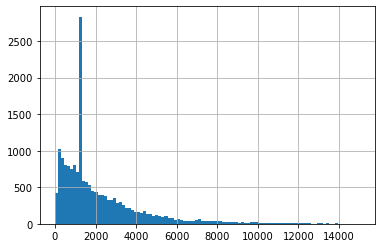

In [14]:
df['days_employed'] = abs(df['days_employed'])
df['days_employed'].hist(bins=100, range=(0,15000))
plt.show() 

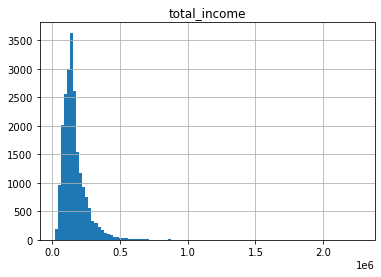

In [15]:
df.hist('total_income', bins=100)
plt.show() 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  age_category      21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


(0.0, 11000.0)

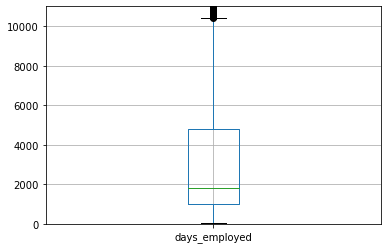

In [17]:
df.boxplot('days_employed')
plt.ylim(0, 11000)

Однозначные выбросы на 32000 и 1250

In [18]:
df['dob_years'].value_counts().tail(15)

22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Целых 101 новорожденный заемщик. К сожалению неизвестно какой возраст пропущен, 

но на результаты исследования это не влияет, можно оставить

In [19]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В столбце с количеством детей тоже обнаружена ошибки. Заменим значения на более реальные.

In [20]:
df['children'] = df['children'].replace(-1,1)
df['children'] = df['children'].replace(20,2)

Для удобства переведем доход и стаж в целые числа

In [21]:

df['total_income'] = df['total_income'].astype('int')
df['days_employed'] = df['days_employed'].astype('int')

### Удаление дубликатов. <a id="duplicates"></a>

Я решил начать с неявных дубликатов, чтобы не повторять метод drop_duplicates() два раза.

Поэтому для начала найдем все уникальные значения в столбце "education".

In [22]:
df['education'].sort_values().unique()

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

Приведем данные к единообразию, тем самым избавимся от дубликатов.

In [23]:
df['education'] = df['education'].str.lower()
df['education'].sort_values().unique()


array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

In [24]:
df.duplicated().sum()

71

In [25]:
df =  df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [26]:
#Удаление этих дубликатов удалит 334 уникальных клиента банка, которым мы придали значение медианой зп и стажа
df['purpose'].sort_values().unique() 

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

**Создание доп.таблиц-словарей для удобства чтения исходного датафрейма**

In [27]:
education = df[['education','education_id']]
family_status = df[['family_status','family_status_id']]
df = df.drop(['family_status','education'], 1)


C:\Users\zapas\AppData\Local\Temp/ipykernel_8036/2915752641.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['family_status','education'], 1)


In [28]:
df = df.drop(['days_employed'], 1)

C:\Users\zapas\AppData\Local\Temp/ipykernel_8036/2996863221.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['days_employed'], 1)


###  Категоризация данных. <a id="category"></a>

#### Категоризация целей кредита.

In [29]:
def purpose_category(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'жил' in purpose or 'движ' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образован' in purpose:
        return 'получение образования'
    else:
        return purpose
    

df['purpose_category'] = df['purpose'].apply(purpose_category)
df = df.drop(['purpose'], 1)
#df['purpose_category'].unique()

C:\Users\zapas\AppData\Local\Temp/ipykernel_8036/2130051844.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['purpose'], 1)


In [30]:
df['purpose_category'].count() #Убедимся, что не появилось значений None

21454

#### Категоризация дохода.

In [31]:
def total_income_category(total_income):
    if total_income <= 30000:
        return 'E'
    elif total_income <= 50000:
        return 'D'
    elif total_income <= 200000:
        return 'C'
    elif total_income <= 1000000:
        return 'B'
    else:
        return 'A'

df['total_income_category'] = df['total_income'].apply(total_income_category) 
#Убедимся, что не появилось значений None
df['total_income_category'].count()

21454

In [32]:
df.head(15)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,age_category,purpose_category,total_income_category
0,1,42,0,0,F,сотрудник,0,253875,средний,операции с недвижимостью,B
1,1,36,1,0,F,сотрудник,0,112080,средний,операции с автомобилем,C
2,0,33,1,0,M,сотрудник,0,145885,средний,операции с недвижимостью,C
3,3,32,1,0,M,сотрудник,0,267628,средний,получение образования,B
4,0,53,1,1,F,пенсионер,0,158616,старый,проведение свадьбы,C
5,0,27,0,1,M,компаньон,0,255763,средний,операции с недвижимостью,B
6,0,43,0,0,F,компаньон,0,240525,средний,операции с недвижимостью,B
7,0,50,1,0,M,сотрудник,0,135823,средний,получение образования,C
8,2,35,0,1,F,сотрудник,0,95856,средний,проведение свадьбы,C
9,0,41,1,0,M,сотрудник,0,144425,средний,операции с недвижимостью,C


## Ответы на вопросы. <a id="analisys"></a>

1. [Зависимость между количеством детей и возвратом кредита в срок](#child)
2. [Зависимость между семейным положением и возвратом кредита в срок](#status)
3. [Зависимость между уровнем дохода и возвратом кредита в срок](#income)
4. [Влияние цели кредита на его возврат в срок](#purpose)
5. [Зависимость возврата кредита в срок от семейного полежения и количества детей](#bonus)
6. [Зависимость возврата кредита в срок от семейного полежения и цели кредита](#bonus_2)

### Зависимость между количеством детей и возвратом кредита в срок <a id="child"></a>

In [33]:
def my_mean(x): return '{:.2%} '.format(x.mean())
df.groupby('children')['debt'].agg(['count',my_mean,'sum']).sort_values('my_mean')

,count,my_mean,sum
children,,,
5,9,0.00%,0
0,14091,7.54%,1063
3,330,8.18%,27
1,4855,9.17%,445
2,2128,9.49%,202
4,41,9.76%,4


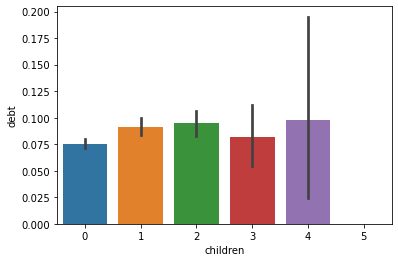

In [34]:
sns.barplot(x=df['children'],y=df['debt'])
plt.show() 

**Вывод:**  Как видно из таблицы и гистограмы чаще всех просрачивают выплату кредита люди с 4мя детьми, а реже всех с 5ю. 
В то же время заметно, что многодетные родители берут кредит реже.

Среди заемщиков наблюдается рост задолжностей с увеличением количества детей, однако родители 3х детей выплачивают кредит вовремя чаще, чем родители 1го ребенка. На основании этих данных сложно сделать выводы, так как в контрольную группу попало мало семей с 4мя и 5ью детьми

In [35]:
# КОД РЕВЬЮЕРА

def my_mean(x): return '{:.2%} '.format(x.mean())

df.groupby('children')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children,,,
0,14091,1063,7.54%
1,4855,445,9.17%
2,2128,202,9.49%
3,330,27,8.18%
4,41,4,9.76%
5,9,0,0.00%


### Зависимость между семейным положением и возвратом кредита в срок <a id="status"></a>

In [36]:
df.groupby(['family_status_id'])['debt'].agg(['count',my_mean,'sum']).sort_values('my_mean')

,count,my_mean,sum
family_status_id,,,
2,959,6.57%,63
3,1195,7.11%,85
0,12339,7.55%,931
1,4151,9.35%,388
4,2810,9.75%,274


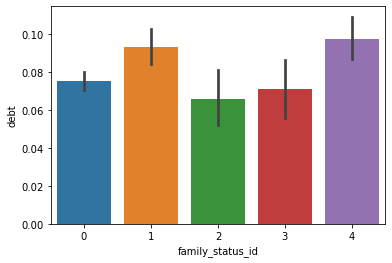

In [37]:
sns.barplot(x=df['family_status_id'],y=df['debt'])
plt.show() 

In [38]:
display(family_status[family_status['family_status_id'] == 0].head(1))
display(family_status[family_status['family_status_id'] == 1].head(1))
display(family_status[family_status['family_status_id'] == 2].head(1))
display(family_status[family_status['family_status_id'] == 3].head(1))
display(family_status[family_status['family_status_id'] == 4].head(1))

,family_status,family_status_id
0,женат / замужем,0


,family_status,family_status_id
4,гражданский брак,1


,family_status,family_status_id
18,вдовец / вдова,2


,family_status,family_status_id
19,в разводе,3


,family_status,family_status_id
24,Не женат / не замужем,4


**Вывод:** из гистограммы видно, что чаще других выплачивают кредит вовремя люди, которые уже бывали в браке, в то время, как неженатые и живущие в гражданском браке люди не выплачивают кредит вовремя в 10% случаев. 

### Зависимость между уровнем дохода и возвратом кредита в срок <a id="income"></a>

In [39]:
df.groupby('total_income_category')['debt'].agg(['count',my_mean,'sum']).sort_values('my_mean')

,count,my_mean,sum
total_income_category,,,
D,350,6.00%,21
B,5042,7.06%,356
A,25,8.00%,2
C,16015,8.49%,1360
E,22,9.09%,2


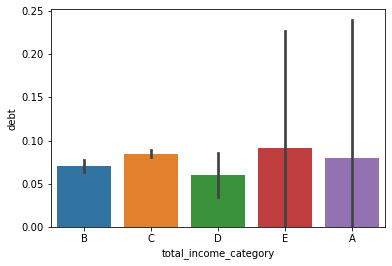

In [40]:
sns.barplot(x=df['total_income_category'],y=df['debt'])
plt.show() 

**Вывод:** размер дохода никак не влияет на своевременное погашение кредита.

### Влияние цели кредита на его возврат в срок <a id="purpose"></a>

In [41]:
df.groupby('purpose_category')['debt'].agg(['count',my_mean,'sum']).sort_values('my_mean')
plt.show() 


<AxesSubplot:xlabel='debt', ylabel='purpose_category'>

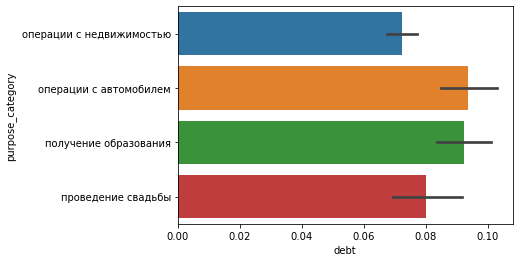

In [42]:
sns.barplot(y=df['purpose_category'],x=df['debt'])

**Вывод:** Заметно, что люди, берущие кредит на недвижимость и проведение свадьбы более надежные заемщики, в то время, как кредиты на автомобиль и образование рискуют быть просроченными.

### Зависимость возврата кредита в срок от семейного полежения и количества детей <a id="bonus"></a>

In [43]:
pivot = df.pivot_table(index='children',columns='family_status_id',values='debt',aggfunc='mean')

family_status_id,0,1,2,3,4
children,,,,,
0,0.069095,0.083883,0.062574,0.070153,0.092838
1,0.082224,0.118000,0.086420,0.066456,0.114537
2,0.093552,0.092958,0.125000,0.096386,0.119048
3,0.068273,0.142857,0.000000,0.090909,0.125000
4,0.103448,0.000000,0.000000,0.000000,0.500000
5,0.000000,0.000000,NaN,NaN,NaN


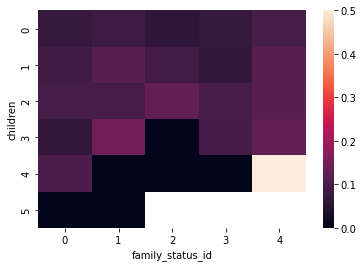

In [44]:
sns.heatmap(pivot)
pivot

Не уверен, что эта таблица имеет важность, но получившиеся данные интересны:
   * Чаще всех просрачивают кредит неженатые люди с 4 детьми

### Зависимость возврата кредита в срок от семейного полежения и цели кредита <a id="bonus_2"></a>

In [45]:
result = df.pivot_table(index='purpose_category',columns='family_status_id',values='debt',aggfunc='mean')

family_status_id,0,1,2,3,4
purpose_category,,,,,
операции с автомобилем,0.083699,0.117512,0.091743,0.074733,0.128728
операции с недвижимостью,0.069349,0.092012,0.051661,0.069527,0.081454
получение образования,0.083237,0.148515,0.075377,0.071429,0.107452
проведение свадьбы,NaN,0.080034,NaN,NaN,NaN


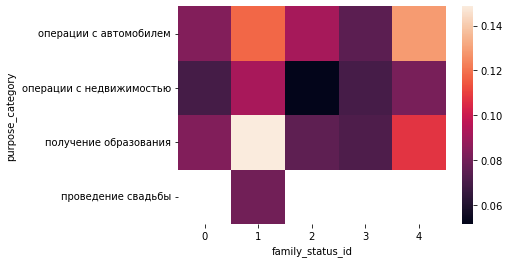

In [46]:
sns.heatmap(result)
result

Выяснив, что на надежность заемщика влияют семейный статус и цели кредита решено определить кто из данных категорий клиентов самый надежный. 

Выходит, что разведеные люди наиболее надежны, т.к. чаще других выплачивают кредит вовремя независимо от целей кредита.

## Общий вывод: <a id="conclusion"></a>

Мы обработали данные банка по заемщикам, удалили дубликаты и заполнили пропуски.
Проведя исследования по поставленной задаче можно точно сказать, что наиболее надежные заемщики - люди бывшие или находящиеся в браке на данный момент, среди них процент невозврата в срок составляет около 7%, в то время, как у неженатых людей этот показатель равен 9,5%.
Среди заемщиков наблюдается рост задолжностей с увеличением количества детей: 
* у бездетных это 7,5%, 
* у родителей одного реберка- 9,1%,
* у родителей 2х детей- 9,4% 
* Однако родители 3х детей выплачивают кредит вовремя чаще, чем родители 1го ребенка - 8,1% задолжностей

Чаще просрачивают выплаты по кредиту на образование и автомобиль: 9,2% и 9,3% соответственно, когда кредиты на недвижимость и свадьбы просрачивают в 7,2% и 8% случаях соответственно, при этом почти 15% заемщиков, живущих в гражданском браке, не закрывают вовремя кредит на образование.

Остальные теории не подтвердились: так, на погашение кредита не влияет доход клиента.